In [49]:
%load_ext autoreload
%autoreload 2
import numpy
from matplotlib import pyplot
import sys
sys.path.append('../../timeseries/')
sys.path.append('../../src/')
import factors
import observation_models
import state_models
from ssm_em import StateSpaceEM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generate some data 

Here we generate some simple data, with some sines and additive Gaussian noise.

In [50]:
T = 1000
trange = numpy.arange(T)
Dx = 3
Dz = 3
X = numpy.empty((T,Dx))
X[:,0] = numpy.sin(trange / 20)
X[:,1] = numpy.sin(trange / 10)
X[:,2] = numpy.sin(trange / 5)
noise_x = .2
noise_z = .1
X += noise_x * numpy.random.randn(*X.shape)

# Linear state space model 

We fit a state space model with linear state and observation model to the data.

First we instantiate the state and observation model.

In [51]:
sm = state_models.LinearStateModel(Dz)
om = observation_models.LinearObservationModel(Dx, Dz)
om.pca_init(X)

Then we give it to the EM object with the data and fit it.

Iteration 2 - llk=-2829.7
Iteration 4 - llk=-1226.0
Iteration 6 - llk=-599.0
Iteration 8 - llk=-358.9
Iteration 10 - llk=-321.2
Iteration 12 - llk=-310.6
Iteration 14 - llk=-306.4
Iteration 16 - llk=-304.2
Iteration 18 - llk=-303.0
Iteration 20 - llk=-302.3
Iteration 22 - llk=-301.8
Iteration 24 - llk=-301.4
Iteration 26 - llk=-301.2
Iteration 28 - llk=-301.1
Iteration 30 - llk=-300.9
Iteration 32 - llk=-300.8
Iteration 34 - llk=-300.8
EM did converge.


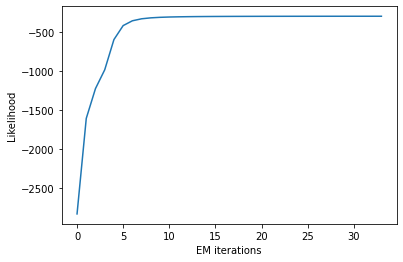

In [52]:
ssm_em_lin = StateSpaceEM(X, observation_model=om, state_model=sm)
ssm_em_lin.run()
pyplot.plot(ssm_em_lin.llk_list[1:])
pyplot.xlabel('EM iterations')
pyplot.ylabel('Likelihood')
pyplot.show()

We show the data density for the training data.

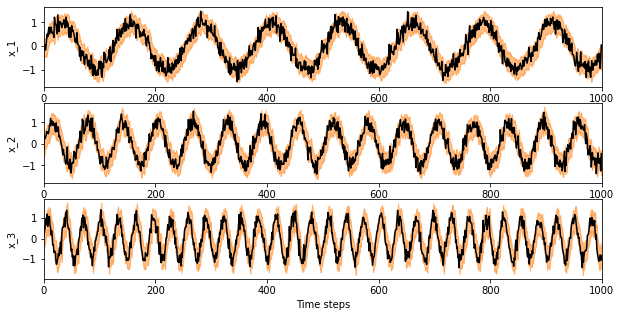

In [53]:
p_x = ssm_em_lin.compute_data_density()
pyplot.figure(figsize=(10,5))
for ix in range(Dx):
    pyplot.subplot(Dx,1,ix+1)
    x_min = p_x.mu[:,ix] - 1.68 * numpy.sqrt(p_x.Sigma[:,ix,ix])
    x_max = p_x.mu[:,ix] + 1.68 * numpy.sqrt(p_x.Sigma[:,ix,ix])
    pyplot.fill_between(range(x_min.shape[0]), x_min, x_max, color='C1', alpha=.5)
    pyplot.plot(X[:,ix],'k')
    pyplot.ylabel('x_%d' %(ix+1))
    pyplot.xlim([0,X.shape[0]])
pyplot.xlabel('Time steps')
pyplot.show()

We can also make predictions, when we delete parts of the data.

In [57]:
X_test = numpy.copy(X)
#X_test[numpy.random.rand(*X_test.shape) < .9] = numpy.nan 
X_test[int(T/2):,:] = numpy.nan
filter_test, mu, std = ssm_em_lin.predict(X_test, smoothed=True)

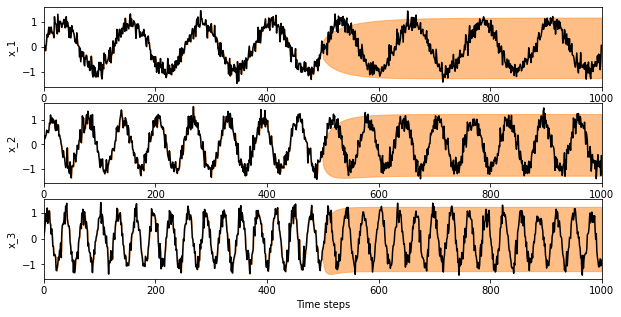

In [58]:
pyplot.figure(figsize=(10,5))
for ix in range(Dx):
    pyplot.subplot(Dx,1,ix+1)
    x_min = mu[:,ix] - 1.68 * std[:,ix]
    x_max = mu[:,ix] + 1.68 * std[:,ix]
    pyplot.fill_between(range(x_min.shape[0]), x_min, x_max, color='C1', alpha=.5)
    pyplot.plot(X[:,ix],'k')
    pyplot.ylabel('x_%d' %(ix+1))
    pyplot.xlim([0,X.shape[0]])
pyplot.xlabel('Time steps')
pyplot.show()

# State space model with non linear transition mean

Now we do the same for a state-space model where the state model is non-linear.

In [59]:
Dk = 4
Dz = 3
# Below is the only line, that changes!
sm = state_models.LSEMStateModel(Dz, Dk)
om = observation_models.LinearObservationModel(Dx, Dz)
om.pca_init(X)

In [60]:
ssm_em = StateSpaceEM(X, observation_model=om, state_model=sm, max_iter=10)

Iteration 2 - llk=-2821.4
Iteration 4 - llk=-1045.1
Iteration 6 - llk=-95.0
Iteration 8 - llk=117.8
Iteration 10 - llk=162.0
EM reached the maximal number of iterations.


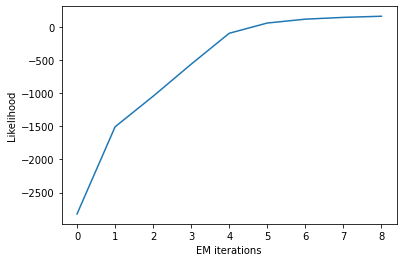

In [61]:
ssm_em.run()
pyplot.plot(ssm_em.llk_list[1:])
pyplot.xlabel('EM iterations')
pyplot.ylabel('Likelihood')
pyplot.show()

Filtering: Nonlinear

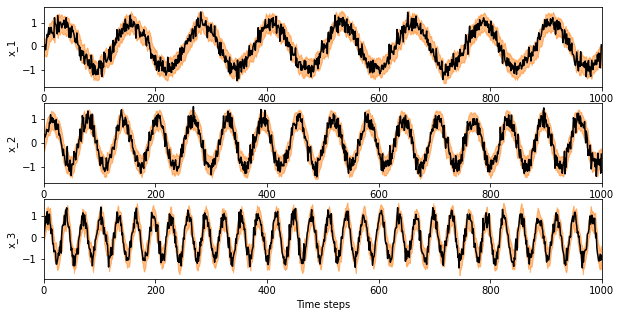

In [64]:
p_x = ssm_em.compute_data_density()
pyplot.figure(figsize=(10,5))
for ix in range(Dx):
    pyplot.subplot(Dx,1,ix+1)# State space model with non linear transition mean
    x_min = p_x.mu[:,ix] - 1.68 * numpy.sqrt(p_x.Sigma[:,ix,ix])
    x_max = p_x.mu[:,ix] + 1.68 * numpy.sqrt(p_x.Sigma[:,ix,ix])
    pyplot.fill_between(range(x_min.shape[0]), x_min, x_max, color='C1', alpha=.5)
    pyplot.plot(X[:,ix],'k')
    pyplot.ylabel('x_%d' %(ix+1))
    pyplot.xlim([0,X.shape[0]])
pyplot.xlabel('Time steps')
pyplot.show()

Prediction: Nonlinear

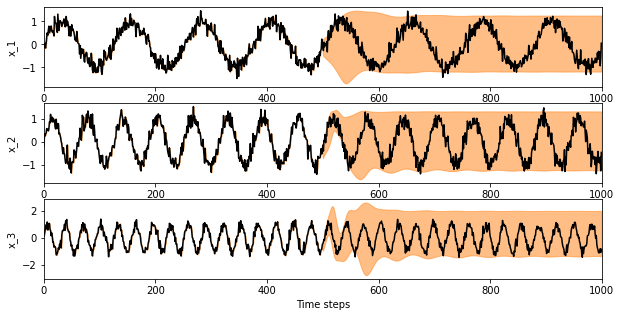

In [65]:
filter_test, mu, std = ssm_em.predict(X_test, smoothed=True)
pyplot.figure(figsize=(10,5))
for ix in range(Dx):
    pyplot.subplot(Dx,1,ix+1)
    x_min = mu[:,ix] - 1.68 * std[:,ix]
    x_max = mu[:,ix] + 1.68 * std[:,ix]
    pyplot.fill_between(range(x_min.shape[0]), x_min, x_max, color='C1', alpha=.5)
    pyplot.plot(X[:,ix],'k')
    pyplot.ylabel('x_%d' %(ix+1))
    pyplot.xlim([0,X.shape[0]])
pyplot.xlabel('Time steps')
pyplot.show()

# Heteroscedastic State space model

And here we do the same again, but with linear transition model and heteroscedastic observation model.

In [13]:
Dk = 10
Dz = 3
Du = 2
sm = state_models.LinearStateModel(Dz)
# Here we change the observation model.
om = observation_models.HCCovObservationModel(Dx, Dz, Du)
om.pca_init(X)
ssm_em = StateSpaceEM(X, observation_model=om, state_model=sm)

Iteration 2 - llk=-1633.3
Iteration 4 - llk=-551.4
Iteration 6 - llk=-356.3
Iteration 8 - llk=-334.6
Iteration 10 - llk=-331.8
Iteration 12 - llk=-330.4
Iteration 14 - llk=-329.2
Iteration 16 - llk=-328.3
Iteration 18 - llk=-327.6
Iteration 20 - llk=-327.1
Iteration 22 - llk=-326.8
Iteration 24 - llk=-326.6
Iteration 26 - llk=-326.4
Iteration 28 - llk=-326.3
Iteration 30 - llk=-326.2
EM did converge.


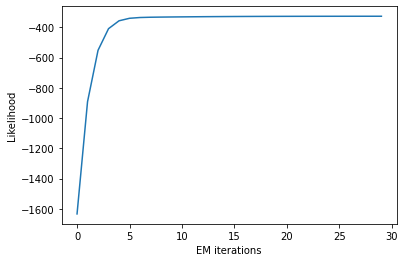

In [14]:
ssm_em.run()
pyplot.plot(ssm_em.llk_list[1:])
pyplot.xlabel('EM iterations')
pyplot.ylabel('Likelihood')
pyplot.show()

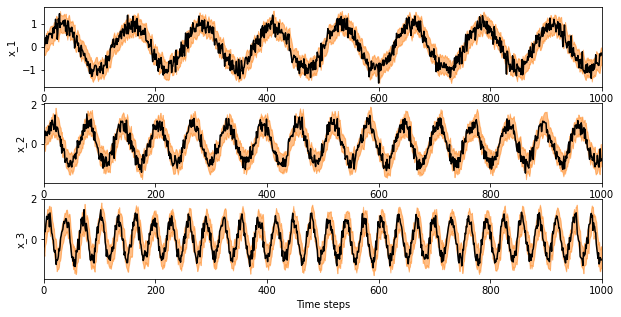

In [15]:
p_x = ssm_em.compute_data_density()
pyplot.figure(figsize=(10,5))
for ix in range(Dx):
    pyplot.subplot(Dx,1,ix+1)
    x_min = p_x.mu[:,ix] - 1.68 * numpy.sqrt(p_x.Sigma[:,ix,ix])
    x_max = p_x.mu[:,ix] + 1.68 * numpy.sqrt(p_x.Sigma[:,ix,ix])
    pyplot.fill_between(range(x_min.shape[0]), x_min, x_max, color='C1', alpha=.5)
    pyplot.plot(X[:,ix],'k')
    pyplot.ylabel('x_%d' %(ix+1))
    pyplot.xlim([0,X.shape[0]])
pyplot.xlabel('Time steps')
pyplot.show()

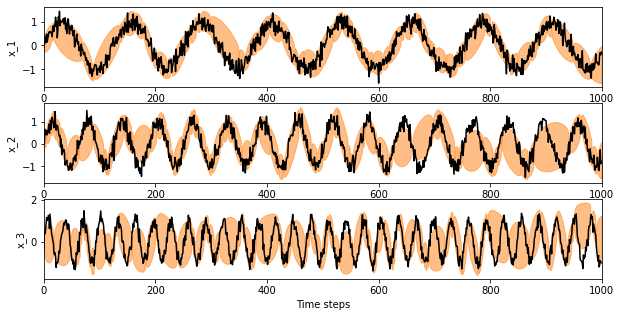

In [16]:
X_test = numpy.copy(X)
X_test[numpy.random.rand(*X_test.shape) < .9] = numpy.nan
filter_test, mu, std = ssm_em.predict(X_test, smoothed=True)
pyplot.figure(figsize=(10,5))
for ix in range(Dx):
    pyplot.subplot(Dx,1,ix+1)
    x_min = mu[:,ix] - 1.68 * std[:,ix]
    x_max = mu[:,ix] + 1.68 * std[:,ix]
    pyplot.fill_between(range(x_min.shape[0]), x_min, x_max, color='C1', alpha=.5)
    pyplot.plot(X[:,ix],'k')
    pyplot.ylabel('x_%d' %(ix+1))
    pyplot.xlim([0,X.shape[0]])
pyplot.xlabel('Time steps')
pyplot.show()

## Lorenz Attractor Example

Application to the Lorenz attractor.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

from scipy.integrate import solve_ivp

 Data consturction

/Users/hideaki/.pyenv/versions/3.7.9/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  from ipykernel import kernelapp as app


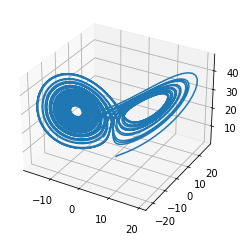

In [68]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def lorenz(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(lorenz, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

In [69]:
from scipy.stats import zscore
X = states[100::2] 
X = zscore(X, axis=0)
X += .01 * numpy.random.randn(*X.shape)

Application of linear model

In [70]:
Dz = 3
sm = state_models.LinearStateModel(Dz)
om = observation_models.LinearObservationModel(Dx, Dz)
om.pca_init(X)

Iteration 2 - llk=-5963.7
Iteration 4 - llk=-2417.8
Iteration 6 - llk=-21.5
Iteration 8 - llk=2912.9
Iteration 10 - llk=5059.5
Iteration 12 - llk=6435.7
Iteration 14 - llk=7331.0
Iteration 16 - llk=7756.6
Iteration 18 - llk=7921.4
Iteration 20 - llk=8004.2
Iteration 22 - llk=8060.9
Iteration 24 - llk=8103.4
Iteration 26 - llk=8136.1
Iteration 28 - llk=8161.7
Iteration 30 - llk=8182.2
Iteration 32 - llk=8198.6
Iteration 34 - llk=8212.0
Iteration 36 - llk=8223.1
Iteration 38 - llk=8232.3
Iteration 40 - llk=8240.0
Iteration 42 - llk=8246.5
Iteration 44 - llk=8252.0
Iteration 46 - llk=8256.8
Iteration 48 - llk=8260.9
Iteration 50 - llk=8264.4
Iteration 52 - llk=8267.5
Iteration 54 - llk=8270.1
Iteration 56 - llk=8272.5
Iteration 58 - llk=8274.6
Iteration 60 - llk=8276.5
Iteration 62 - llk=8278.2
EM did converge.


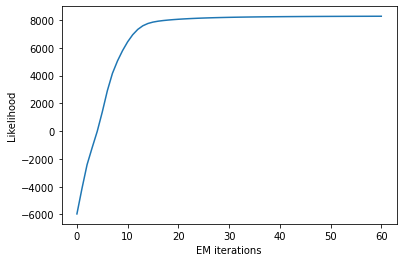

In [71]:
ssm_em_lin = StateSpaceEM(X, observation_model=om, state_model=sm)
ssm_em_lin.run()
pyplot.plot(ssm_em_lin.llk_list[1:])
pyplot.xlabel('EM iterations')
pyplot.ylabel('Likelihood')
pyplot.show()

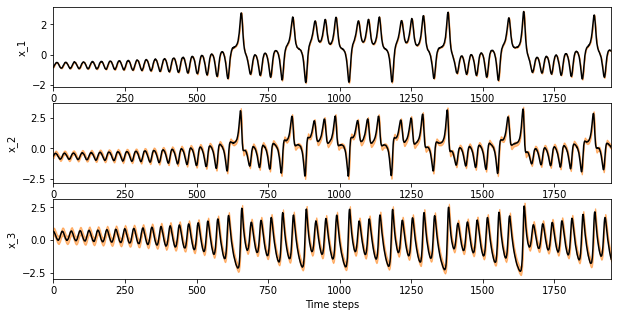

In [86]:
p_x = ssm_em_lin.compute_data_density()
pyplot.figure(figsize=(10,5))
for ix in range(Dx):
    pyplot.subplot(Dx,1,ix+1)
    x_min = p_x.mu[:,ix] - 1.68 * numpy.sqrt(p_x.Sigma[:,ix,ix])
    x_max = p_x.mu[:,ix] + 1.68 * numpy.sqrt(p_x.Sigma[:,ix,ix])
    pyplot.fill_between(range(x_min.shape[0]), x_min, x_max, color='C1', alpha=.5)
    pyplot.plot(X[:,ix],'k')
    pyplot.ylabel('x_%d' %(ix+1))
    pyplot.xlim([0,X.shape[0]])
pyplot.xlabel('Time steps')
pyplot.show()

Linear model prediction

In [98]:
X_test = numpy.copy(X)
#X_test[numpy.random.rand(*X_test.shape) < .9] = numpy.nan
X_test[int(X.shape[0]*3/4):,:] = numpy.nan
filter_test, mu, std = ssm_em_lin.predict(X_test, smoothed=True)

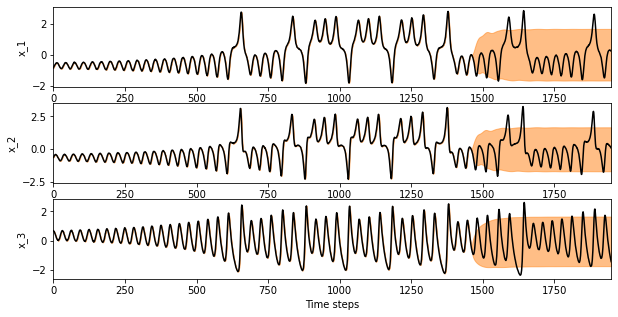

In [99]:
pyplot.figure(figsize=(10,5))
for ix in range(Dx):
    pyplot.subplot(Dx,1,ix+1)
    x_min = mu[:,ix] - 1.68 * std[:,ix]
    x_max = mu[:,ix] + 1.68 * std[:,ix]
    pyplot.fill_between(range(x_min.shape[0]), x_min, x_max, color='C1', alpha=.5)
    pyplot.plot(X[:,ix],'k')
    pyplot.ylabel('x_%d' %(ix+1))
    pyplot.xlim([0,X.shape[0]])
pyplot.xlabel('Time steps')
pyplot.show()

Application of nonlinear model

In [91]:
Dk = 4
Dz = 3
# Below is the only line, that changes!
sm = state_models.LSEMStateModel(Dz, Dk)
om = observation_models.LinearObservationModel(Dx, Dz)
om.pca_init(X)

Iteration 2 - llk=-5924.6
Iteration 4 - llk=-1795.3
Iteration 6 - llk=1387.4
Iteration 8 - llk=5480.4
Iteration 10 - llk=9690.6
Iteration 12 - llk=12818.9
Iteration 14 - llk=14871.2
Iteration 16 - llk=15743.9
Iteration 18 - llk=16047.7
Iteration 20 - llk=16202.8
Iteration 22 - llk=16301.7
Iteration 24 - llk=16374.4
Iteration 26 - llk=16435.3
Iteration 28 - llk=16480.3
Iteration 30 - llk=16518.1
EM did converge.


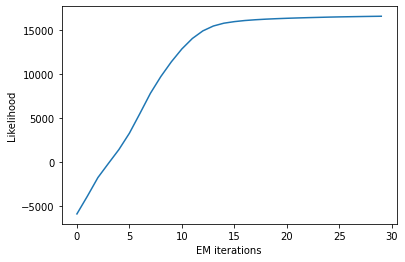

In [92]:
ssm_em = StateSpaceEM(X, observation_model=om, state_model=sm, conv_crit=1e-3)
ssm_em.run()
pyplot.plot(ssm_em.llk_list[1:])
pyplot.xlabel('EM iterations')
pyplot.ylabel('Likelihood')
pyplot.show()

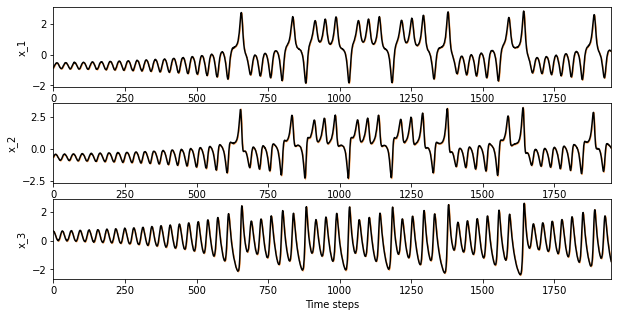

In [93]:
p_x = ssm_em.compute_data_density()
pyplot.figure(figsize=(10,5))
for ix in range(Dx):
    pyplot.subplot(Dx,1,ix+1)
    x_min = p_x.mu[:,ix] - 1.68 * numpy.sqrt(p_x.Sigma[:,ix,ix])
    x_max = p_x.mu[:,ix] + 1.68 * numpy.sqrt(p_x.Sigma[:,ix,ix])
    pyplot.fill_between(range(x_min.shape[0]), x_min, x_max, color='C1', alpha=.5)
    pyplot.plot(X[:,ix],'k')
    pyplot.ylabel('x_%d' %(ix+1))
    pyplot.xlim([0,X.shape[0]])
pyplot.xlabel('Time steps')
pyplot.show()

Nonlinear model: prediction

In [96]:
X_test = numpy.copy(X)
#X_test[numpy.random.rand(*X_test.shape) < .5] = numpy.nan
X_test[int(X.shape[0]*3/4):,:] = numpy.nan
filter_test, mu, std = ssm_em.predict(X_test, smoothed=True)

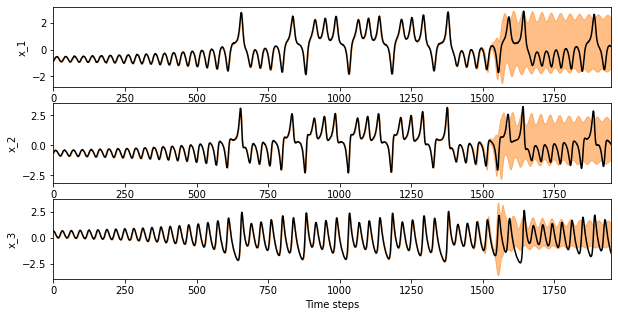

In [97]:
pyplot.figure(figsize=(10,5))
for ix in range(Dx):
    pyplot.subplot(Dx,1,ix+1)
    x_min = mu[:,ix] - 1.68 * std[:,ix]
    x_max = mu[:,ix] + 1.68 * std[:,ix]
    pyplot.fill_between(range(x_min.shape[0]), x_min, x_max, color='C1', alpha=.5)
    pyplot.plot(X[:,ix],'k')
    pyplot.ylabel('x_%d' %(ix+1))
    pyplot.xlim([0,X.shape[0]])
pyplot.xlabel('Time steps')
pyplot.show()